In [1]:
from jammer_power import *

for i in list_nu_p:
    i.calculate_p_avg()

Pavg = 1.1499999999999997
Pavg = 2.1750000000000003
Pavg = 3.0625
Pavg = 4.0
Pavg = 5.075000000000001
Pavg = 6.1625
Pavg = 7.2
Pavg = 8.075
Pavg = 9.0


In [1]:
# Change d_t from 1 to 9
from parameters import *
from simulation.greedy_strategy import GreedyStrategy

for i in range(10):
    greedy = GreedyStrategy(d_t=i+1)
    greedy.run()

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5746
Avg throughput (packages/time unit) = 1.1492
Avg loss (packages/time unit) = 1.8508
PDR = 38.28114590273151%
---------------------------------------------------
Total packages send = 15010
Loss packages = 9254
Success packages = 5746
Package still in queue = 10
csv/greedy_throughput.csv created with 2 columns.
csv/greedy_loss.csv created with 2 columns.
csv/greedy_pdr.csv created with 2 columns.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5759
Avg throughput (packages/time unit) = 1.1518
Avg loss (packages/time unit) = 1.8748
PDR = 38.030773294591555%
---------------------------------------------------
Total packages send = 15143
Loss packages = 9374
Success packages = 5759
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/gree

/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavi

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5705
Avg throughput (packages/time unit) = 1.141
Avg loss (packages/time unit) = 1.8668
PDR = 37.90949564755133%
---------------------------------------------------
Total packages send = 15049
Loss packages = 9334
Success packages = 5705
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/greedy_loss.csv already exists.
csv/greedy_pdr.csv already exists.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5745
Avg throughput (packages/time unit) = 1.149
Avg loss (packages/time unit) = 1.8396
PDR = 38.42038386945764%
---------------------------------------------------
Total packages send = 14953
Loss packages = 9198
Success packages = 5745
Package still in queue = 10
csv/greedy_throughput.csv already exists.
csv/greedy_loss.csv already exists.

In [1]:
# Greedy change Pavg from 1W to 9W
# Change d_t from 1 to 9
from parameters import *
from simulation.greedy_strategy import GreedyStrategy
from jammer_power import *

for i in range(9):
    jammer_power = list_nu_p[i]
    greedy = GreedyStrategy()
    greedy.set_jammer_power(i+1, nu=jammer_power.nu, nu_p=jammer_power.nu_p)
    greedy.run()

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5741
Avg throughput (packages/time unit) = 1.1482
Avg loss (packages/time unit) = 1.8208
PDR = 38.64692022887917%
---------------------------------------------------
Total packages send = 14855
Loss packages = 9104
Success packages = 5741
Package still in queue = 10
csv/greedy_power_throughput.csv created with 2 columns.
csv/greedy_power_loss.csv created with 2 columns.
csv/greedy_power_pdr.csv created with 2 columns.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5756
Avg throughput (packages/time unit) = 1.1512
Avg loss (packages/time unit) = 1.9012
PDR = 37.68988999476166%
---------------------------------------------------
Total packages send = 15272
Loss packages = 9506
Success packages = 5756
Package still in queue = 10
csv/greedy_power_throughput.csv a

/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)
/Users/dunghoangtrung125/workspace/personal/graduation_thesis/source_code/util/csv_util.py:22: FutureWarning: The behavi

---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5713
Avg throughput (packages/time unit) = 1.1426
Avg loss (packages/time unit) = 1.816
PDR = 38.59352833885023%
---------------------------------------------------
Total packages send = 14803
Loss packages = 9080
Success packages = 5713
Package still in queue = 10
csv/greedy_power_throughput.csv already exists.
csv/greedy_power_loss.csv already exists.
csv/greedy_power_pdr.csv already exists.
---------------------------------------------------
Result after running simulation in 5000 time units
Number packages sent successfully = 5754
Avg throughput (packages/time unit) = 1.1508
Avg loss (packages/time unit) = 1.8934
PDR = 37.77821548158361%
---------------------------------------------------
Total packages send = 15231
Loss packages = 9467
Success packages = 5754
Package still in queue = 10
csv/greedy_power_throughput.csv already exists.
csv/greedy

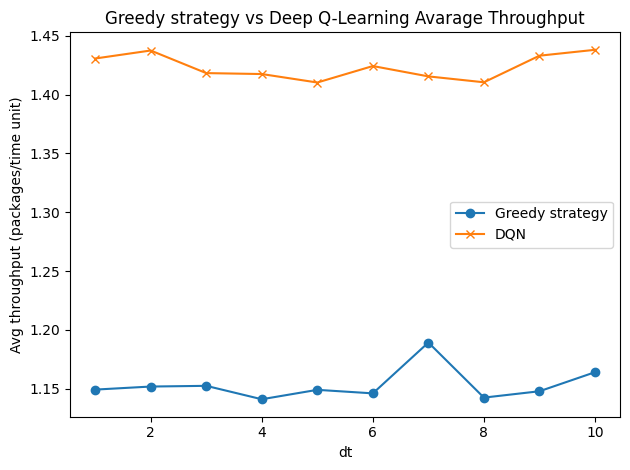

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_throughput = pd.read_csv('csv/greedy_throughput.csv')
df_dqn_throughput = pd.read_csv('csv/ddqn_throughput.csv')

plt.plot(df_htt_throughput['d_t'], df_htt_throughput['throughput'], marker='o', label='Greedy strategy')
plt.plot(df_dqn_throughput['d_t'], df_dqn_throughput['throughput'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('Avg throughput (packages/time unit)')
plt.title('Greedy strategy vs Deep Q-Learning Avarage Throughput')
plt.tight_layout()
plt.legend()
plt.show()

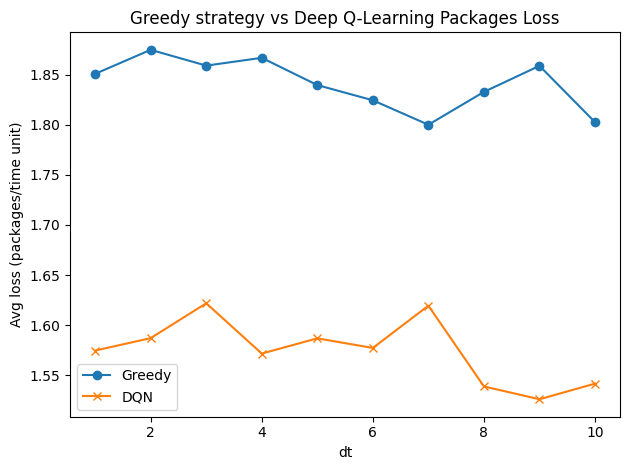

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_loss = pd.read_csv('csv/greedy_loss.csv')
df_ddqn_loss = pd.read_csv('csv/ddqn_loss.csv')

plt.plot(df_htt_loss['d_t'], df_htt_loss['package_loss'], marker='o', label='Greedy')
plt.plot(df_ddqn_loss['d_t'], df_ddqn_loss['package_loss'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('Avg loss (packages/time unit)')
plt.title('Greedy strategy vs Deep Q-Learning Packages Loss')
plt.tight_layout()
plt.legend()
plt.show()

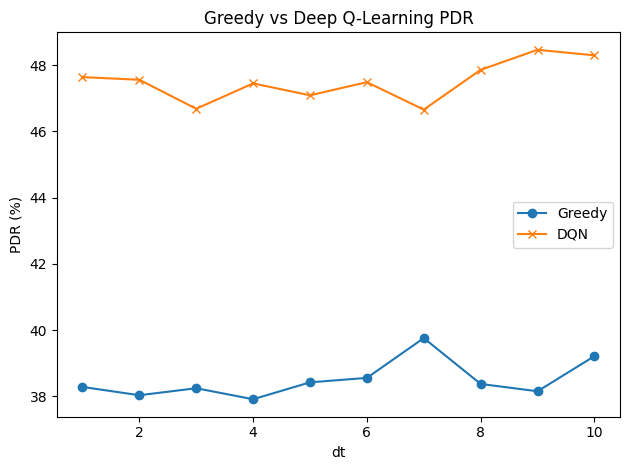

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df_htt_loss = pd.read_csv('csv/greedy_pdr.csv')
df_ddqn_loss = pd.read_csv('csv/ddqn_pdr.csv')

plt.plot(df_htt_loss['d_t'], df_htt_loss['pdr'], marker='o', label='Greedy')
plt.plot(df_ddqn_loss['d_t'], df_ddqn_loss['pdr'], marker='x', label='DQN')
plt.xlabel('dt')
plt.ylabel('PDR (%)')
plt.title('Greedy vs Deep Q-Learning PDR')
plt.tight_layout()
plt.legend()
plt.show()

Greedy and DQN with Pavg change from 1W to 9W


In [ ]:
from dqn import DQN

dqn = DQN(dueling=False)
dqn.learning()